## Starting Point

The purpose of this notebook is to build a **CNN model** that can recognize images, whether the image are **pasta** or **pizza**.

Please run this notebook in Google Colab

## Setting Up The Directory

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
''' directory for the training pizza and pasta '''

train_pizza_dir = os.path.join('/content/drive/MyDrive/class_pizza/pizza')
train_pasta_dir = os.path.join('/content/drive/MyDrive/class_pizza/pasta')

In [ ]:
''' listing the images in directory '''

train_pizza_name = os.listdir(train_pizza_dir)
train_pasta_name = os.listdir(train_pasta_dir)

In [ ]:
print('total training pizza images:', len(train_pizza_name))
print('total training pasta images:', len(train_pasta_name))

total training pizza images: 493
total training pasta images: 559


## Splitting The Folders

In [ ]:
pip install split-folders

In [ ]:
import splitfolders

In [ ]:
base_dir = '/content/drive/MyDrive/class_pizza'

# split the folder into 80% train and 20% validation
splitfolders.ratio(base_dir, output=f'{base_dir}/dataset', seed=42, ratio=(0.8, 0.2), group_prefix=None)
# splitfolders.ratio(base_dir, output='/content/drive/MyDrive/class_pizza/dataset', seed=42, ratio=(0.8, 0.2), group_prefix=None)

Copying files: 1052 files [00:33, 31.41 files/s]


## Building The Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
''' creating 5 convolution layers with 300x300 image size by 3 bytes color '''

model = Sequential([
    # first convolution layers
    Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    MaxPooling2D(2,2),
    # second convolution layers
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # third convolution layers
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # fourth convolution layers
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # fifth convolution layers
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # converting into 1 dimensional array
    Flatten(),
    # has 512 neuron hidden layer
    Dense(512, activation='relu'),
    # has only 1 output which is, 0 is pasta and 1 is pizza
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

## Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
''' data augmentation '''

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
pizza = '/content/drive/MyDrive/class_pizza/dataset/train'
pasta = '/content/drive/MyDrive/class_pizza/dataset/val'

train_generator = train_datagen.flow_from_directory(
    pizza, # train directory
    target_size=(300,300), # set all the images by 300x300
    batch_size=32,
  # set class_mode to 'binary', since we used 'binary_crossentropy' in training parameters
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    pasta, # validation directory
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

Found 841 images belonging to 2 classes.
Found 211 images belonging to 2 classes.


## Compiling The Model

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
''' Set training parameters '''

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

## Training The Model

In [ ]:
''' training the model with validation data and early stopping '''

history = model.fit(
    train_generator,
    steps_per_epoch=26, # total number of train samples divided by batch size
    epochs=20,
    validation_data=validation_generator,
    validation_steps=6, # total number of validation samples divided by batch size
    verbose=1,
)

Epoch 1/20
 4/26 [===>..........................] - ETA: 34s - loss: 0.5640 - accuracy: 0.7344

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


26/26 [==============================] - 64s 2s/step - loss: 0.6198 - accuracy: 0.6885 - val_loss: 0.6059 - val_accuracy: 0.6979
Epoch 2/20
26/26 [==============================] - 63s 2s/step - loss: 0.5637 - accuracy: 0.7145 - val_loss: 0.5010 - val_accuracy: 0.7604
Epoch 3/20
26/26 [==============================] - 52s 2s/step - loss: 0.5308 - accuracy: 0.7330 - val_loss: 0.5055 - val_accuracy: 0.7552
Epoch 4/20
26/26 [==============================] - 62s 2s/step - loss: 0.5013 - accuracy: 0.7614 - val_loss: 0.5031 - val_accuracy: 0.7604
Epoch 5/20
26/26 [==============================] - 62s 2s/step - loss: 0.4994 - accuracy: 0.7503 - val_loss: 0.5058 - val_accuracy: 0.7344
Epoch 6/20
26/26 [==============================] - 61s 2s/step - loss: 0.4947 - accuracy: 0.7454 - val_loss: 0.5419 - val_accuracy: 0.7448
Epoch 7/20
26/26 [==============================] - 53s 2s/step - loss: 0.5167 - accuracy: 0.7478 - val_loss: 0.4270 - val_accuracy: 0.7917
Epoch 8/20
26/26 [=============

## Visualization The Accuracy

In [ ]:
import matplotlib.pyplot as plt

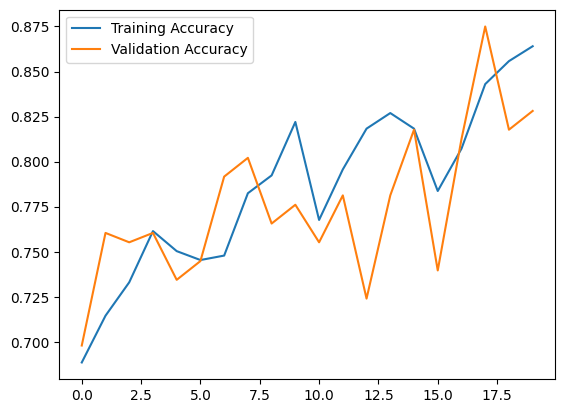

In [ ]:
''' plotting the progress of training and validation accuracy '''

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## Model Prediction

In [ ]:
import numpy as np
from google.colab import files

from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
''' predicting the uploaded image '''

uploaded = files.upload()

for filename in uploaded.keys():

  path = '/content/' + filename
  # the image is resize by 300x300
  img = load_img(path, target_size=(300, 300))
  # convert the image into array, then divided by 255
  x = img_to_array(img)/ 255
  x = np.expand_dims(x, axis=0) # set a new axis for array

  images = np.vstack([x]) # Stack arrays in sequence vertically

  # predict the image
  classes = model.predict(images, batch_size=10)

  print(classes[0]) # printing the probabilities
  if classes[0] > 0.5:
    print(filename + " is a pizza")
  else:
    print(filename + " is a pasta")

Saving slicepizza.jpg to slicepizza.jpg
1/1 [==============================] - 0s 21ms/step
[0.9472565]
slicepizza.jpg is a pizza


## Saving The Model

In [ ]:
from tensorflow.keras.models import save_model
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Visualizing What The Model See From The Image

In [ ]:
import random

1/1 [==============================] - 0s 314ms/step


<ipython-input-24-214c1e800889>:41: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


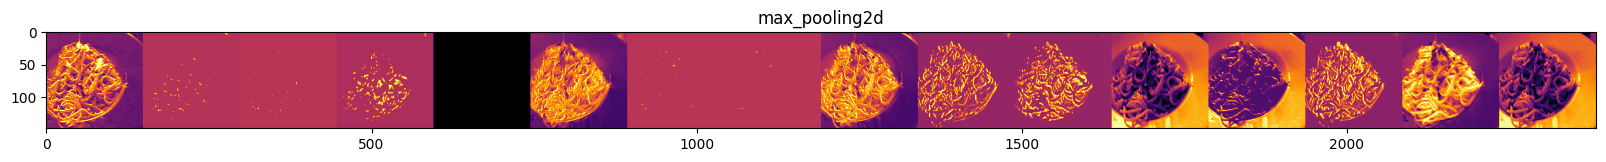

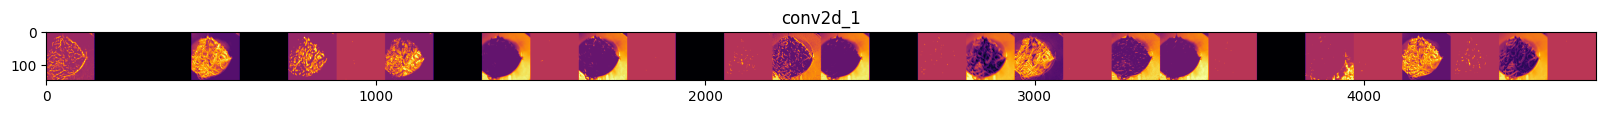

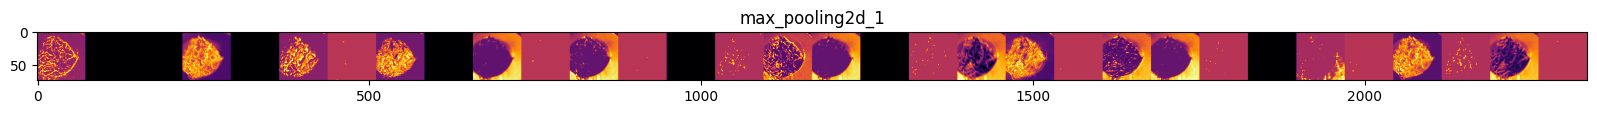

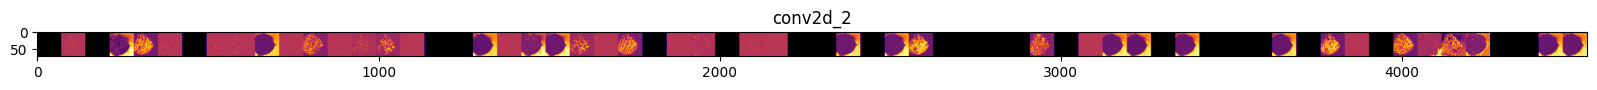

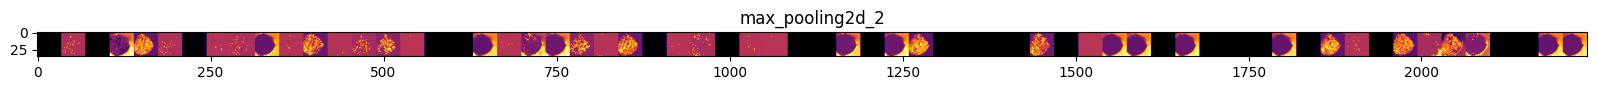

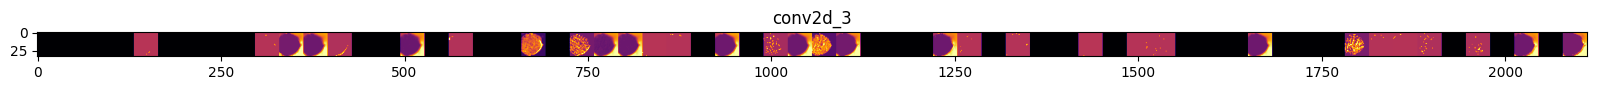

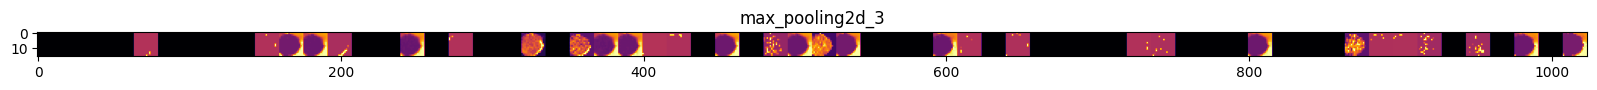

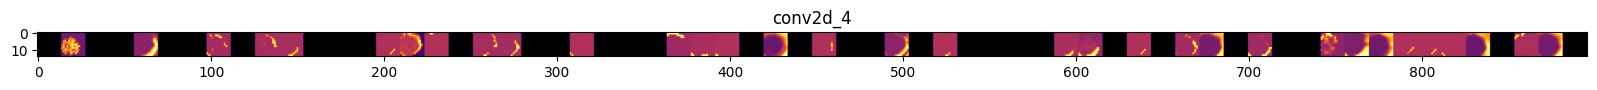

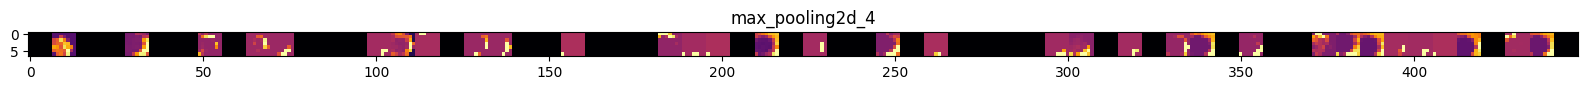

In [ ]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
pizza_img_files = [os.path.join(train_pizza_dir, f) for f in train_pizza_name]
pasta_img_files = [os.path.join(train_pasta_dir, f) for f in train_pasta_name]
img_path = random.choice(pizza_img_files + pasta_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='inferno')